In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import numpy as np
from scipy import stats
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, mean_squared_error, average_precision_score, confusion_matrix, f1_score, precision_score, precision_recall_curve, recall_score
from sklearn.metrics import roc_curve, mean_absolute_error, r2_score, classification_report, plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from IPython.display import Image
import graphviz
import pydotplus

In [ ]:
# Conduct an exploratory screening of the dataset provided

df = pd.read_excel("/content/drive/MyDrive/IDS506/Assignment 6 CKD/Chronic Kidney Disease Dataset.xlsx", sheet_name='All Data')
print("No. of variables = ",len(df.columns))
print("No. of records = ",len(df))

No. of variables =  34
No. of records =  8819


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8819 non-null   float64
 1   Age               8819 non-null   float64
 2   Female            8819 non-null   float64
 3   Racegrp           8819 non-null   object 
 4   Educ              8799 non-null   float64
 5   Unmarried         8367 non-null   float64
 6   Income            7653 non-null   float64
 7   CareSource        8819 non-null   object 
 8   Insured           8706 non-null   float64
 9   Weight            8625 non-null   float64
 10  Height            8628 non-null   float64
 11  BMI               8529 non-null   float64
 12  Obese             8529 non-null   float64
 13  Waist             8505 non-null   float64
 14  SBP               8511 non-null   float64
 15  DBP               8439 non-null   float64
 16  HDL               8802 non-null   float64


In [ ]:
print(df)

          ID   Age  Female Racegrp  Educ  Unmarried  Income CareSource  \
0        1.0  65.0     1.0   white   0.0        0.0     1.0      other   
1        2.0  36.0     1.0   hispa   0.0        NaN     1.0    noplace   
2        3.0  66.0     1.0   white   0.0        1.0     0.0    noplace   
3        4.0  54.0     1.0   white   1.0        0.0     0.0      DrHMO   
4        5.0  63.0     1.0   black   0.0        0.0     NaN     clinic   
...      ...   ...     ...     ...   ...        ...     ...        ...   
8814  8815.0  32.0     1.0   white   1.0        0.0     1.0      DrHMO   
8815  8816.0  77.0     1.0   white   0.0        1.0     0.0     clinic   
8816  8817.0  56.0     1.0   white   0.0        0.0     NaN      DrHMO   
8817  8818.0  25.0     1.0   black   0.0        1.0     NaN     clinic   
8818  8819.0  60.0     0.0   black   0.0        1.0     0.0    noplace   

      Insured  Weight  ...  Hypertension  Fam Hypertension  Diabetes  \
0         1.0    56.0  ...           0.

In [ ]:
df1 = df[["Age", "Female", "Racegrp", "Obese", "Dyslipidemia", "PVD", "Activity", "Smoker", "Hypertension", "Diabetes", "Stroke", "CVD", "CHF", "CKD"]]
print(df1)

       Age  Female Racegrp  Obese  Dyslipidemia  PVD  Activity  Smoker  \
0     65.0     1.0   white    0.0           0.0  0.0       3.0     1.0   
1     36.0     1.0   hispa    0.0           0.0  0.0       3.0     0.0   
2     66.0     1.0   white    1.0           1.0  0.0       1.0     1.0   
3     54.0     1.0   white    0.0           0.0  0.0       2.0     1.0   
4     63.0     1.0   black    0.0           0.0  0.0       1.0     0.0   
...    ...     ...     ...    ...           ...  ...       ...     ...   
8814  32.0     1.0   white    0.0           0.0  0.0       1.0     1.0   
8815  77.0     1.0   white    0.0           0.0  0.0       3.0     0.0   
8816  56.0     1.0   white    0.0           0.0  0.0       3.0     0.0   
8817  25.0     1.0   black    1.0           0.0  0.0       2.0     0.0   
8818  60.0     0.0   black    0.0           0.0  0.0       4.0     0.0   

      Hypertension  Diabetes  Stroke  CVD  CHF  CKD  
0              0.0       0.0     0.0  1.0  0.0  0.0  
1  

In [ ]:
df1.isna().sum()

Age                0
Female             0
Racegrp            0
Obese            290
Dyslipidemia       0
PVD                0
Activity          10
Smoker             0
Hypertension      80
Diabetes           2
Stroke            11
CVD               23
CHF               36
CKD             2819
dtype: int64

In [ ]:
df2 = df1.dropna(subset=['CKD']).fillna(0)
df2.isna().sum()
print(df2)

       Age  Female Racegrp  Obese  Dyslipidemia  PVD  Activity  Smoker  \
0     65.0     1.0   white    0.0           0.0  0.0       3.0     1.0   
1     36.0     1.0   hispa    0.0           0.0  0.0       3.0     0.0   
2     66.0     1.0   white    1.0           1.0  0.0       1.0     1.0   
3     54.0     1.0   white    0.0           0.0  0.0       2.0     1.0   
4     63.0     1.0   black    0.0           0.0  0.0       1.0     0.0   
...    ...     ...     ...    ...           ...  ...       ...     ...   
5995  77.0     0.0   white    1.0           0.0  0.0       2.0     1.0   
5996  49.0     0.0   white    1.0           0.0  0.0       2.0     0.0   
5997  30.0     0.0   black    0.0           0.0  0.0       1.0     0.0   
5998  75.0     0.0   black    0.0           0.0  0.0       1.0     1.0   
5999  35.0     1.0   white    0.0           0.0  0.0       2.0     1.0   

      Hypertension  Diabetes  Stroke  CVD  CHF  CKD  
0              0.0       0.0     0.0  1.0  0.0  0.0  
1  

In [ ]:
df3 = df2
df3.loc[(df3['Age'] >= 60), 'Age >=60'] = '1'
df3.loc[(df3['Age'] < 60), 'Age >=60'] = '0'
df3 = df3.drop(columns=['Age'])

df3.head()

,Female,Racegrp,Obese,Dyslipidemia,PVD,Activity,Smoker,Hypertension,Diabetes,Stroke,CVD,CHF,CKD,Age >=60
0,1.0,white,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1.0,hispa,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,white,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,1.0,white,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,black,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df4 = df3
df4.loc[(df4['Racegrp'] == 'white'), 'R:white'] = '1'
df4.loc[(df4['Racegrp'] != 'white'), 'R:white'] = '0'

df4.loc[(df4['Racegrp'] == 'black'), 'R:black'] = '1'
df4.loc[(df4['Racegrp'] != 'black'), 'R:black'] = '0'

df4.loc[(df4['Racegrp'] == 'hispa'), 'R:hispa'] = '1'
df4.loc[(df4['Racegrp'] != 'hispa'), 'R:hispa'] = '0'

df4.loc[(df4['Racegrp'] == 'other'), 'R:other'] = '1'
df4.loc[(df4['Racegrp'] != 'other'), 'R:other'] = '0'

df4 = df4.drop(columns=['Racegrp'])

df4.head()

,Female,Obese,Dyslipidemia,PVD,Activity,Smoker,Hypertension,Diabetes,Stroke,CVD,CHF,CKD,Age >=60,R:white,R:black,R:hispa,R:other
0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0
1,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0
3,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0


In [ ]:
df5 = df4
df5.loc[(df5['Activity'] == 1.0) | (df5['Activity'] == 0), 'A:sit'] = '1'
df5.loc[(df5['Activity'] != 1.0), 'A:sit'] = '0'

df5.loc[(df5['Activity'] == 2.0), 'A:walk'] = '1'
df5.loc[(df5['Activity'] != 2.0), 'A:walk'] = '0'

df5.loc[(df5['Activity'] == 3.0), 'A:light loads'] = '1'
df5.loc[(df5['Activity'] != 3.0), 'A:light loads'] = '0'

df5.loc[(df5['Activity'] == 4.0), 'A:heavy loads'] = '1'
df5.loc[(df5['Activity'] != 4.0), 'A:heavy loads'] = '0'

df5 = df5.drop(columns=['Activity'])

df5.head()



,Female,Obese,Dyslipidemia,PVD,Smoker,Hypertension,Diabetes,Stroke,CVD,CHF,CKD,Age >=60,R:white,R:black,R:hispa,R:other,A:sit,A:walk,A:light loads,A:heavy loads
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0,0,0,1,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0
2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,0,0,0


In [ ]:
df55 = df5.eval('NoChrDisease = Obese + Dyslipidemia + PVD + Hypertension	+ Diabetes + Stroke + CVD + CHF')


df55.head()

,Female,Obese,Dyslipidemia,PVD,Smoker,Hypertension,Diabetes,Stroke,CVD,CHF,...,Age >=60,R:white,R:black,R:hispa,R:other,A:sit,A:walk,A:light loads,A:heavy loads,NoChrDisease
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,0,0,1,0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,1,0,0,0,1,0,0,0,3.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,0,0,1.0


In [ ]:
df5['Female'].value_counts()

1.0    3135
0.0    2865
Name: Female, dtype: int64

In [ ]:
gdf55 = df55.groupby(by="CKD", dropna=False)
gdf55['NoChrDisease'].value_counts()

CKD  NoChrDisease
0.0  0.0             2249
     1.0             1792
     2.0             1005
     3.0              344
     4.0              105
     5.0               32
     6.0                7
     7.0                1
     8.0                1
1.0  2.0              143
     1.0              120
     3.0              103
     4.0               41
     0.0               38
     5.0               12
     6.0                6
     7.0                1
Name: NoChrDisease, dtype: int64

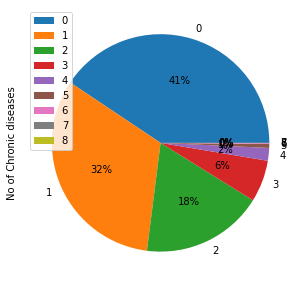

In [ ]:
df56 = pd.DataFrame({'No of Chronic diseases': [2249, 1792, 1005, 344, 105, 32, 7, 1, 1]},
                  index=['0', '1', '2', '3', '4', '5', '6', '7', '8'])
plot = df56.plot.pie(y='No of Chronic diseases', figsize=(5, 5), autopct='%1.0f%%')

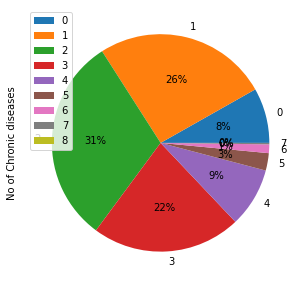

In [ ]:
df57 = pd.DataFrame({'No of Chronic diseases': [38, 120, 143, 103, 41, 12, 6, 1, 0]},
                  index=['0', '1', '2', '3', '4', '5', '6', '7', '8'])
plot = df57.plot.pie(y='No of Chronic diseases', figsize=(5, 5), autopct='%1.0f%%')

In [ ]:
#df5['Obese'].round(decimals = 2)
df6 = df5

df6['Female']= df6['Female'].apply(int).apply(str)
df6['Obese']= df6['Obese'].apply(int).apply(str)
df6['Dyslipidemia']= df6['Dyslipidemia'].apply(int).apply(str)
df6['PVD']= df6['PVD'].apply(int).apply(str)
df6['Smoker']= df6['Smoker'].apply(int).apply(str)
df6['Hypertension']= df6['Hypertension'].apply(int).apply(str)
df6['Diabetes']= df6['Diabetes'].apply(int).apply(str)
df6['Stroke']= df6['Stroke'].apply(int).apply(str)
df6['CVD']= df6['CVD'].apply(int).apply(str)
df6['CHF']= df6['CHF'].apply(int).apply(str)
df6['CKD']= df6['CKD'].apply(int).apply(str)

df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Female         6000 non-null   object
 1   Obese          6000 non-null   object
 2   Dyslipidemia   6000 non-null   object
 3   PVD            6000 non-null   object
 4   Smoker         6000 non-null   object
 5   Hypertension   6000 non-null   object
 6   Diabetes       6000 non-null   object
 7   Stroke         6000 non-null   object
 8   CVD            6000 non-null   object
 9   CHF            6000 non-null   object
 10  CKD            6000 non-null   object
 11  Age >=60       6000 non-null   object
 12  R:white        6000 non-null   object
 13  R:black        6000 non-null   object
 14  R:hispa        6000 non-null   object
 15  R:other        6000 non-null   object
 16  A:sit          6000 non-null   object
 17  A:walk         6000 non-null   object
 18  A:light loads  6000 non-null

In [ ]:
df6.head()

,Female,Obese,Dyslipidemia,PVD,Smoker,Hypertension,Diabetes,Stroke,CVD,CHF,CKD,Age >=60,R:white,R:black,R:hispa,R:other,A:sit,A:walk,A:light loads,A:heavy loads
0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0


In [ ]:
X = df6.drop(columns=['CKD'])
y = df6[['CKD']]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Risk factors','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

    Risk factors       Score
10      Age >=60  440.260209
8            CVD  258.657545
5   Hypertension  198.589784
3            PVD  164.617751
9            CHF  152.839990
7         Stroke  148.669286
6       Diabetes  129.211602
15         A:sit   50.553997
13       R:hispa   34.675722
11       R:white   30.926579


<ipython-input-57-664012bd4b97>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.0858128  0.07505345 0.05542664 0.05600256 0.08076502 0.07451824
 0.06947087 0.03959895 0.06164837 0.06202322 0.16885564 0.03236999
 0.02134578 0.02695573 0.00693178 0.02999269 0.02802162 0.01729346
 0.00791319]


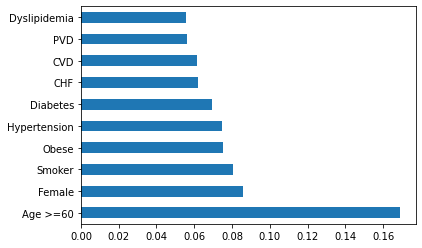

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

Y1=df6['CKD'].values
X1=df6[df6.columns.drop(['CKD'])].values
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, stratify=Y1,random_state=123) # 70% training and 30% test

df6['CKD'].value_counts()

0    5536
1     464
Name: CKD, dtype: int64

In [ ]:
logistic = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
logistic.fit(X_train, y_train)
logistic_ypred = logistic.predict(X_test)
print('The accuracy of logistic regression for training dataset is ', logistic.score(X_train, y_train))
print('The accuracy of logistic regression for testing dataset is ', logistic.score(X_test, y_test))

The accuracy of logistic regression for training dataset is  0.9219047619047619
The accuracy of logistic regression for testing dataset is  0.9227777777777778


In [ ]:
logistic.predict_proba(X_test)

array([[0.9536561 , 0.0463439 ],
       [0.89829121, 0.10170879],
       [0.98386499, 0.01613501],
       ...,
       [0.98142006, 0.01857994],
       [0.73158381, 0.26841619],
       [0.98606072, 0.01393928]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


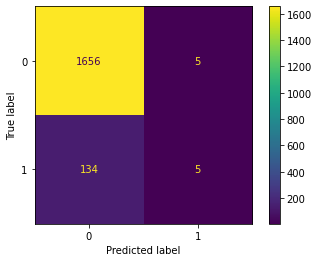

In [ ]:
plot_confusion_matrix(logistic, X_test, y_test)

In [ ]:
print(classification_report(y_test, logistic_ypred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1661
           1       0.50      0.04      0.07       139

    accuracy                           0.92      1800
   macro avg       0.71      0.52      0.51      1800
weighted avg       0.89      0.92      0.89      1800



Feature: 0, Score: 0.14591
Feature: 1, Score: -0.14851
Feature: 2, Score: 0.02492
Feature: 3, Score: 0.64841
Feature: 4, Score: -0.11283
Feature: 5, Score: 1.00427
Feature: 6, Score: 0.48839
Feature: 7, Score: 0.12422
Feature: 8, Score: 0.50153
Feature: 9, Score: 0.50502
Feature: 10, Score: 1.95229
Feature: 11, Score: -0.34836
Feature: 12, Score: -0.89832
Feature: 13, Score: -1.28243
Feature: 14, Score: -0.82337
Feature: 15, Score: -0.15325
Feature: 16, Score: -0.55557
Feature: 17, Score: -1.03007
Feature: 18, Score: -1.06138


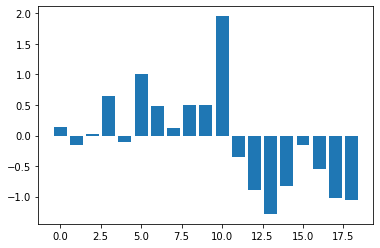

In [ ]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get importance
importance = logistic.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
col = df6.columns.drop(['CKD'])
importance = logistic.coef_[0]

fea_dfxc = pd.DataFrame({'columns':col,'importance':importance})
fea_dfxc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfxc.reset_index(drop=True,inplace=True)
# display(fea_dfxc)
fea_dfxc.head(19)

,columns,importance
0,Age >=60,1.952293
1,Hypertension,1.004273
2,PVD,0.648411
3,CHF,0.505017
4,CVD,0.501534
5,Diabetes,0.488387
6,Female,0.145911
7,Stroke,0.124218
8,Dyslipidemia,0.024923
9,Smoker,-0.112833


In [ ]:
#dfุ6.groupby(by="CKD", dropna=False)


gdf6 = df6.groupby(by="CKD", dropna=False)
gdf6['Age >=60'].value_counts()

CKD  Age >=60
0    0           3931
     1           1605
1    1            407
     0             57
Name: Age >=60, dtype: int64

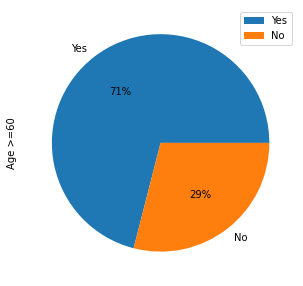

In [ ]:
df11 = pd.DataFrame({'Age >=60': [3931, 1605]},
                  index=['Yes', 'No'])
plot = df11.plot.pie(y='Age >=60', figsize=(5, 5), autopct='%1.0f%%')



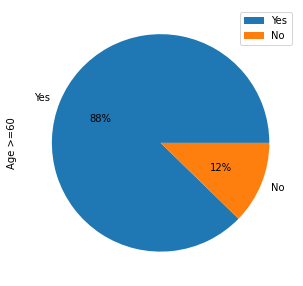

In [ ]:
df12 = pd.DataFrame({'Age >=60': [407, 57]},
                  index=['Yes', 'No'])
plot = df12.plot.pie(y='Age >=60', figsize=(5, 5), autopct='%1.0f%%')


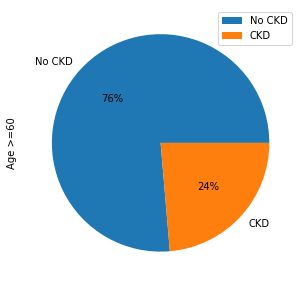

In [ ]:
df13 = pd.DataFrame({'Age >=60': [1605, 497]},
                  index=['No CKD', 'CKD'])
plot = df13.plot.pie(y='Age >=60', figsize=(5, 5), autopct='%1.0f%%')

In [ ]:
#dfุ6.groupby(by="CKD", dropna=False)


gdf6 = df6.groupby(by="CKD", dropna=False)
gdf6['Hypertension'].value_counts()

CKD  Hypertension
0    0               3529
     1               2007
1    1                367
     0                 97
Name: Hypertension, dtype: int64

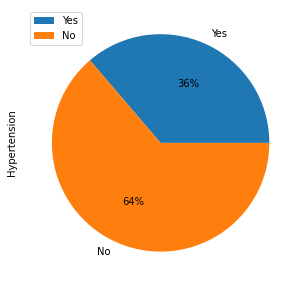

In [ ]:
df21 = pd.DataFrame({'Hypertension': [2007, 3527]},
                  index=['Yes', 'No'])
plot = df21.plot.pie(y='Hypertension', figsize=(5, 5), autopct='%1.0f%%')

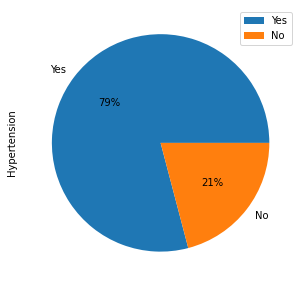

In [ ]:
df22 = pd.DataFrame({'Hypertension': [367, 97]},
                  index=['Yes', 'No'])
plot = df22.plot.pie(y='Hypertension', figsize=(5, 5), autopct='%1.0f%%')

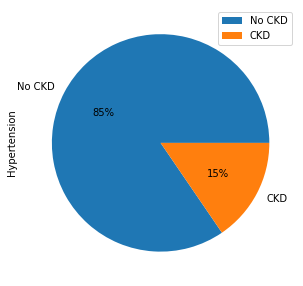

In [ ]:
df23 = pd.DataFrame({'Hypertension': [2007, 367]},
                  index=['No CKD', 'CKD'])
plot = df23.plot.pie(y='Hypertension', figsize=(5, 5), autopct='%1.0f%%')